In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [3]:
# Read in Data
a = pd.read_csv("Reviews.csv")

In [5]:
a.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
print(a.shape) 

(568454, 10)


## Quick EDA

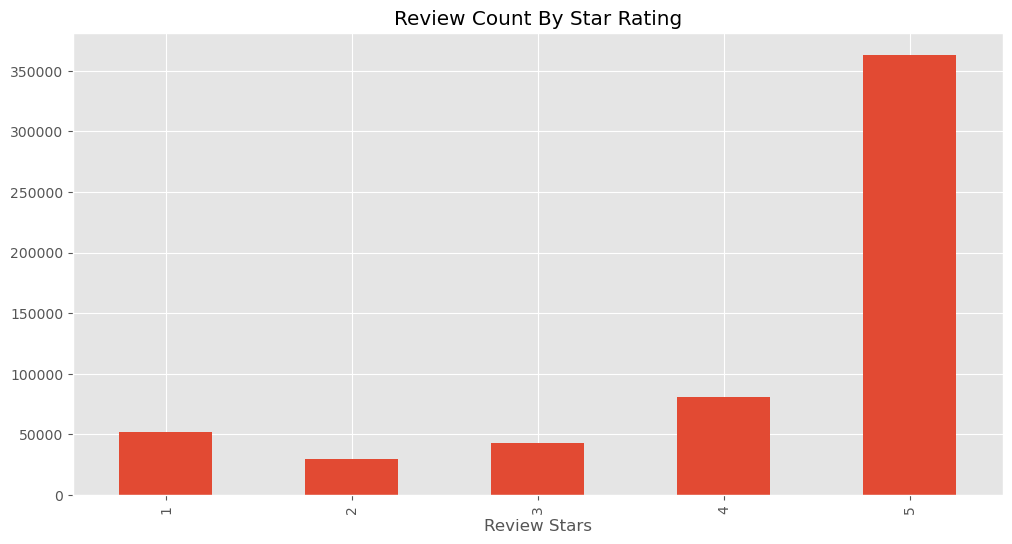

In [9]:
b = a['Score'].value_counts().sort_index().plot(kind="bar", title = "Review Count By Star Rating", figsize = (12,6))
b.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [11]:
ex = a['Text'][10]
print(ex)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [13]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
tk = nltk.word_tokenize(ex)
tk[:15]

[nltk_data] Downloading package punkt_tab to C:\Users\Yashas
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['I',
 'do',
 "n't",
 'know',
 'if',
 'it',
 "'s",
 'the',
 'cactus',
 'or',
 'the',
 'tequila',
 'or',
 'just',
 'the']

In [15]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize

def get_sentiment(ex):
    tokens = word_tokenize(ex)
    positive_words = {}
    negative_words = {}
    neutral_words = {}

    for token in tokens:
        word_blob = TextBlob(token)
        polarity = word_blob.sentiment.polarity

        if polarity > 0:
            positive_words[token] = polarity
        elif polarity < 0:
            negative_words[token] = polarity
        else:
            neutral_words[token] = polarity

    # Compute overall sentiment for the whole text
    overall_blob = TextBlob(ex)
    sentiment_value = overall_blob.sentiment.polarity
    sentiment_label = 'Positive' if sentiment_value > 0 else 'Negative' if sentiment_value < 0 else 'Neutral'

    return sentiment_label, positive_words, negative_words, neutral_words, sentiment_value

ex = a['Text'][10]  # One review text
sentiment_label, positive_words, negative_words, neutral_words, sentiment_value = get_sentiment(ex)

# Count words
pos_count = len(positive_words)
neg_count = len(negative_words)
neu_count = len(neutral_words)

# Print results
print("Sentiment:", sentiment_label)
print("Positive Words Count:", pos_count)
print("Negative Words Count:", neg_count)
print("Neutral Words Count:", neu_count)

Sentiment: Positive
Positive Words Count: 7
Negative Words Count: 3
Neutral Words Count: 92


In [17]:
# part of speech tagging for the the words
import nltk
nltk.download('averaged_perceptron_tagger_eng')

tagged = nltk.pos_tag(tk)
tagged[:15]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Yashas Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC'),
 ('the', 'DT'),
 ('tequila', 'NN'),
 ('or', 'CC'),
 ('just', 'RB'),
 ('the', 'DT')]

In [19]:
from nltk import word_tokenize, pos_tag, ne_chunk

# Download required NLTK models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import nltk
nltk.download('maxent_ne_chunker_tab')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package punkt to C:\Users\Yashas
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yashas Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Yashas
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Yashas
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Yashas Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


## VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
s = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Yashas
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
s.polarity_scores("I am very good!")

{'neg': 0.0, 'neu': 0.365, 'pos': 0.635, 'compound': 0.54}

In [25]:
s.polarity_scores("I can't do this")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [27]:
s.polarity_scores("Do your work, you filthy moron!")

{'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.5411}

In [29]:
s.polarity_scores(ex)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [31]:
# Run the polarity score on the entire dataset

res = {}
for i, row in a.iterrows():
    text = row['Text']
    myid = row['Id']
    res[myid] = s.polarity_scores(text)



In [35]:
vads = pd.DataFrame(res).T
vads = vads.reset_index().rename(columns={'index': 'Id'})
vads = vads.merge(a, how='left')

In [37]:
# Now we have sentiment score and metadata
print(vads)

            Id    neg    neu    pos  compound   ProductId          UserId  \
0            1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1            2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2            3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3            4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4            5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   
...        ...    ...    ...    ...       ...         ...             ...   
568449  568450  0.072  0.600  0.327    0.8589  B001EO7N10  A28KG5XORO54AY   
568450  568451  0.190  0.697  0.114   -0.4848  B003S1WTCU  A3I8AFVPEE8KI5   
568451  568452  0.037  0.884  0.078    0.4352  B004I613EE  A121AA1GQV751Z   
568452  568453  0.041  0.506  0.452    0.9717  B004I613EE   A3IBEVCTXKNOH   
568453  568454  0.000  0.846  0.154    0.4754  B001LR2CU2  A3LGQPJCZVL9UC   

                            ProfileName  HelpfulnessNumerator  \
0         

## Plot VADER Results

C:\Users\Yashas Chandra\AppData\Local\Temp\ipykernel_18536\127187827.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vads, x='Score', y='compound', palette=palette)


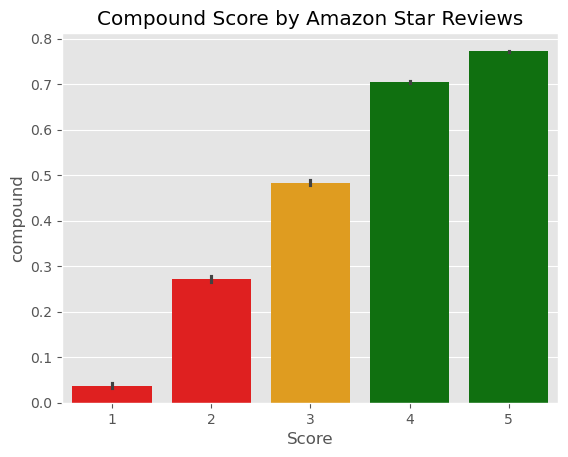

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color mapping for each score
score_colors = {
    1: 'red',
    2: 'red',
    3: 'orange',
    4: 'green',
    5: 'green'
}

# Create color palette list in the order of unique scores
palette = [score_colors[score] for score in sorted(vads['Score'].unique())]

# Plot compound score barplot with custom colors
ax = sns.barplot(data=vads, x='Score', y='compound', palette=palette)
ax.set_title('Compound Score by Amazon Star Reviews')
plt.show()

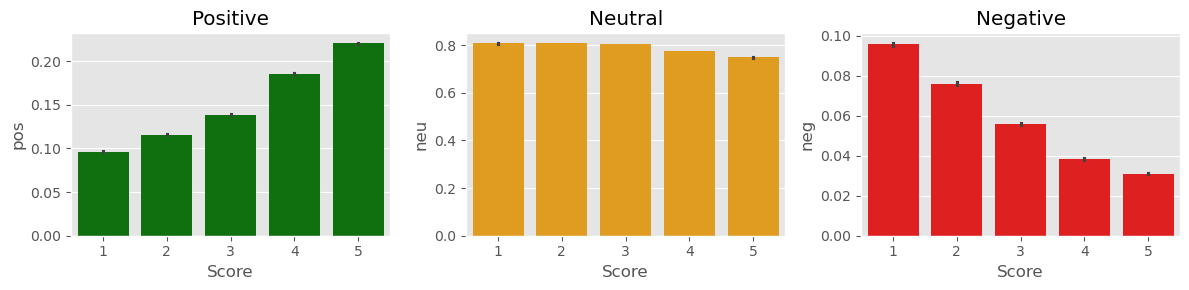

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vads, x='Score', y='pos', ax=axs[0], color = "green")
sns.barplot(data=vads, x='Score', y='neu', ax=axs[1], color = "orange")
sns.barplot(data=vads, x='Score', y='neg', ax=axs[2], color = "red")
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

In [57]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [59]:
ml = f"cardiffnlp/twitter-roberta-base-sentiment"
tokz = AutoTokenizer.from_pretrained(ml)
ml = AutoModelForSequenceClassification.from_pretrained(ml)

In [61]:
#VADER 
print(ex)
s.polarity_scores(ex)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [73]:
#Run for Roberta Model
encoded_txt = tokz(ex, return_tensors='pt')
output = ml(**encoded_txt)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores
scores_dict = {
    'roberta_negative' : scores[0],
    'roberta_neutral' : scores[1],
    'roberta_positive' : scores[2]
    }
print(scores_dict)

{'roberta_negative': 0.01913417, 'roberta_neutral': 0.07104461, 'roberta_positive': 0.9098212}


In [75]:
def polarity_scores_roberta(ex):
    encoded_txt = tokz(ex, return_tensors='pt')
    output = ml(**encoded_txt)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores
    scores_dict = {
        'roberta_negative' : scores[0],
        'roberta_neutral' : scores[1],
        'roberta_positive' : scores[2]
        }
    return scores_dict

In [83]:
res = {}
for i, row in a.iterrows():
    try:
        text = row['Text']
        myid = row['Id']
        Vad_Result = s.polarity_scores(text)
        Vad_Result_Rename = {}
        for key, value in Vad_Result.items():
            Vad_Result_Rename[f"vader_{key}"] = value
        Roberta_Result = polarity_scores_roberta(text)
        both = {**Vad_Result_Rename, **Roberta_Result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
        

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583
Broke for id 5040
Broke for id 5182
Broke for id 5192
Broke for id 5365
Broke for id 5442
Broke for id 5709
Broke for id 5998
Broke for id 6003
Broke for id 6007
Broke for id 6106
Broke for id 6234
Broke for id 6558

IndexError: index out of range in self

In [79]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441,
 'roberta_negative': 0.009624222,
 'roberta_neutral': 0.049980354,
 'roberta_positive': 0.94039536}

In [86]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(a, how='left')

In [88]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [90]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_negative', 'roberta_neutral', 'roberta_positive', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

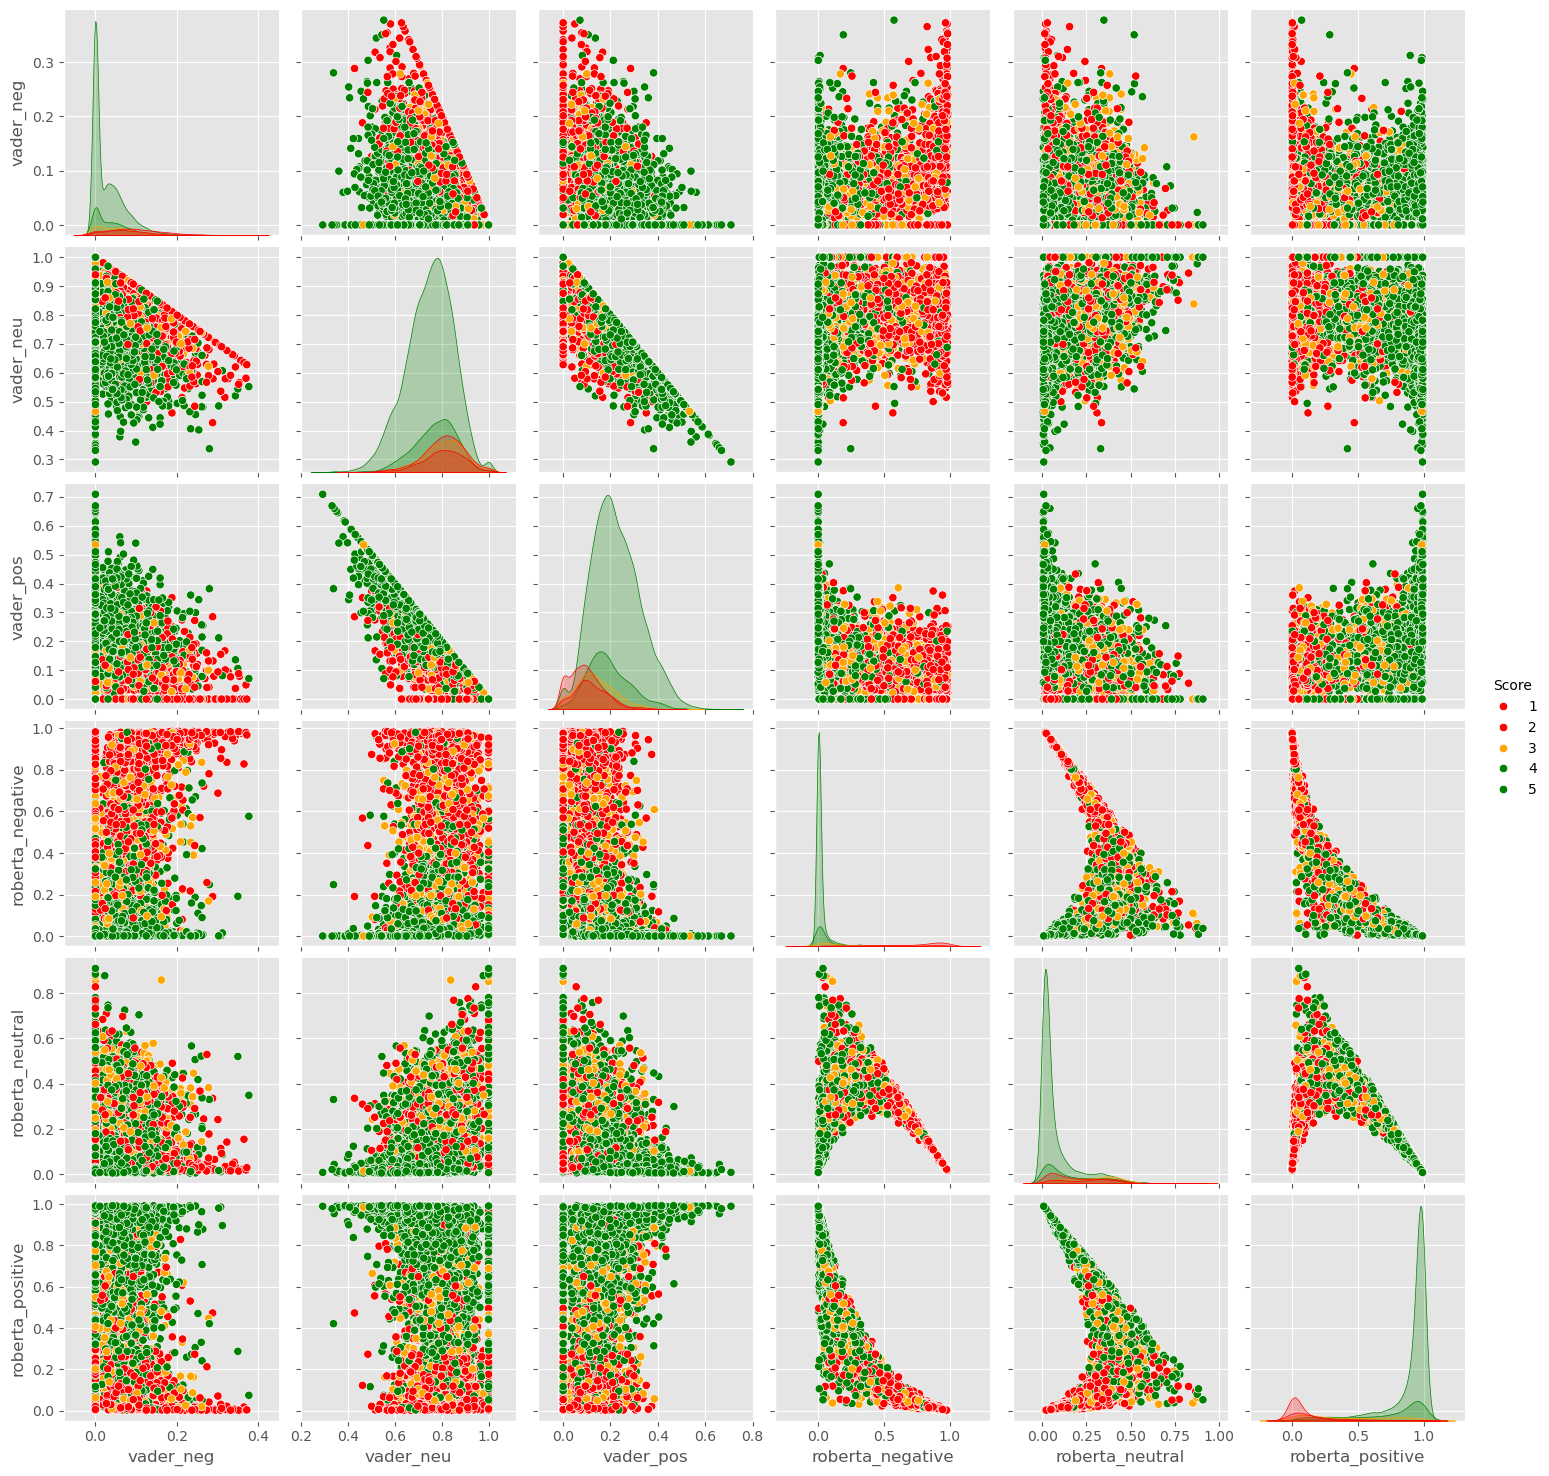

In [96]:
score_colors = {
    1: 'red',
    2: 'red',
    3: 'orange',
    4: 'green',
    5: 'green'
}

# Create color palette list in the order of unique scores
palette = [score_colors[score] for score in sorted(results_df['Score'].unique())]

sns.pairplot(data = results_df, 
        vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_negative', 'roberta_neutral', 'roberta_positive'],
        hue = 'Score',
        palette = palette)

plt.show()

## Review Examples
Positive 1 star and Negative 5 star reviews

In [107]:
#Positive 1-Star Reviews
results_df.query("Score == 1") \
.sort_values('roberta_positive', ascending = False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [109]:
results_df.query("Score == 1") \
.sort_values('vader_pos', ascending = False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

In [111]:
#Negative 5-star Reviews
results_df.query("Score == 5") \
.sort_values('roberta_negative', ascending = False)['Text'].values[0]

'THEY ARE DELICIOUS NOT SALTY YOU CAN SIT AND EAT 2-3 2 OUNCE BAGS AT A TIME I GIVE THESE 5 STARS PLUS I HAVE TO STOP MYSELF FROM EATING THEM THEY ARE DELICIOUS.'

In [113]:
results_df.query("Score == 5") \
.sort_values('vader_neg', ascending = False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

## Extra :- The Transformers Pipeline

In [120]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.7 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.5/1.7 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 15.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 4.1/376.0 MB 88.6 MB/s eta 0:00:05
    --------------------------------------- 7.9/376.0 MB 85.3 MB/s eta 0:00:05
   - -------------------------------------- 10.1/376.0 MB 80.4 MB/s eta 0:00:05
   - -------------------------------------- 13.8/376.0 MB 73.1 MB/s eta 0:00:05
   - -------------------------------------- 17.5/376.0 MB 73.1 MB/s eta 0:00:05
   -- ------------------------------------- 21.4/376.0 MB 81.8 MB/s eta 0:00:05
   -- ------------------------------------- 25.2/376.0 MB 93.9 MB/s eta 0:00:04
   --- ------------------------------------ 29.6/376.0 MB 93.9 MB/s eta 

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Yashas Chandra\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [146]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")  # Use PyTorch backend
print(sentiment_pipeline("I love football!"))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998346567153931}]


In [162]:
print(sentiment_pipeline("ok, please wait while I process your request!"))

[{'label': 'NEGATIVE', 'score': 0.9901071786880493}]


In [164]:
print(sentiment_pipeline("ok, I will get back to you!!"))

[{'label': 'POSITIVE', 'score': 0.999118983745575}]
